In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

In [9]:
data= pd.read_csv('diabetes.csv')

In [10]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Outcome'>

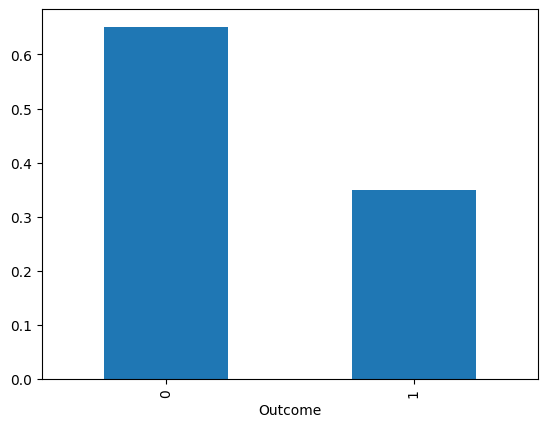

In [11]:
data.Outcome.value_counts(normalize= True).plot(kind='bar')

In [12]:
X= data.drop('Outcome', axis =1).to_numpy()
Y= data[['Outcome']].to_numpy()

In [13]:
scaler= StandardScaler()
scaled_x= scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, Y, test_size=0.2, random_state= 42, stratify=Y)


In [15]:
pd.DataFrame(y_train).value_counts(normalize= True)

0
0    0.651466
1    0.348534
Name: proportion, dtype: float64

In [16]:
#logistic regression

log_reg= LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\pkhad\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [38]:
y_pred = log_reg.predict(X_test)

In [39]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [40]:
np.sum(y_test.flatten() == y_pred)/len(y_test.flatten())

np.float64(0.7142857142857143)

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
matrix= confusion_matrix(y_test,y_pred)

Text(50.722222222222214, 0.5, 'Actual label')

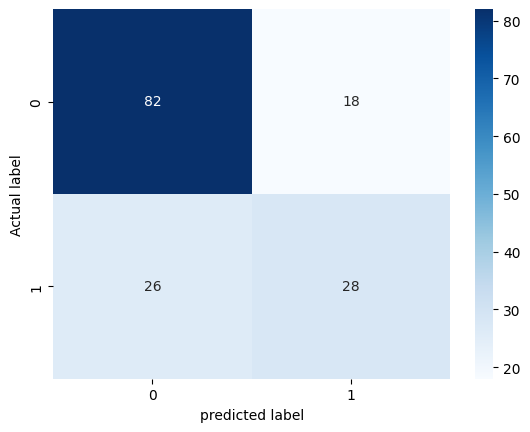

In [43]:
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.xlabel('predicted label')
plt.ylabel('Actual label')

In [44]:
from sklearn.metrics import precision_score, recall_score

# # Example: true labels and predicted labels
# y_true = [0, 1, 1, 1, 0, 1, 0]
# y_pred = [0, 0, 1, 1, 0, 1, 1]

# Compute metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.6086956521739131
Recall: 0.5185185185185185


In [45]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.56